# Word Embeddings and Language Model


*   Word Embeddings
  * Tokenization
  * Embedding layer
*   Language models
  *   Causal Language Modeling
  *   Bidirectional Language Modeling





## What Is An Embedding?

An embedding is a numerical representation of a piece of information, for example, text, documents, images, audio, etc. The representation captures the semantic meaning of what is being embedded, making it robust for many industry applications.

In NLP, neural networks can only process the int or float inputs, a sequence of natural languages has to be converted into a sequence of numerical representations for further computation.

A tokenizer and an embedding layer is used to finish this job.

# Tokenization

A tokenizer is in charge of preparing the inputs for a model.
Tokenizing a text is splitting it into words or subwords, which then are converted to ids through a look-up table.
For example, given a sequence:

```I am a student from City University of Hong Kong, I am learning the NLP.```

We can formulate a vocabulary:

| Words      |index|
|------------|----|
| I          | 0  |
| am         | 1  |
| a          | 2  |
| student    | 3  |
| from       | 4  |
| the        | 5  |
| city       | 6  |
| university | 7  |
| of         | 8  |
| hong       | 9  |
| kong       | 10 |
| learning   | 11 |
| nlp        | 12 |

Then we can convert the original sequence to:

```[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 11, 5, 12]```

Tokenization with whitespace looks very simple, but it has two main disadvantage:

1. Vocabulary size will be very large, for example ```learning, learned, learn, help, helped, helping``` will be 6 different elements in a vocabulary. What about only add ```learn, help, ing, ed``` to the vocabulary to save more vocabulary space?

2. Ignore the relationship between the same words with different form. For example 'learn', 'learned' ant 'learning' are with the same semantic meaning.

Solution:
**Subwords tokenization**

Subword tokenization algorithms rely on the principle that frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords. For instance "annoyingly" might be considered a rare word and could be decomposed into "annoying" and "ly". Both "annoying" and "ly" as stand-alone subwords would appear more frequently while at the same time the meaning of "annoyingly" is kept by the composite meaning of "annoying" and "ly".

Some of the tokenization algorithms:

- Byte-Pair Encoding (BPE)
- Byte-level BPE
- WordPiece
- Unigram
- SentencePiece

In [ ]:
!pip install sentencepiece

In [ ]:
!pip install transformers[torch] datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("t5-base")
tokenized_sequence = tokenizer.tokenize("I am a student from City University of Hong Kong, I am learning the NLP.")
print(tokenized_sequence)
ids = tokenizer.convert_tokens_to_ids(tokenized_sequence)
print(ids)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


['▁I', '▁am', '▁', 'a', '▁student', '▁from', '▁City', '▁University', '▁of', '▁Hong', '▁Kong', ',', '▁I', '▁am', '▁learning', '▁the', '▁N', 'LP', '.']
[27, 183, 3, 9, 1236, 45, 896, 636, 13, 7764, 7807, 6, 27, 183, 1036, 8, 445, 6892, 5]


## Embeddings

An embedding layer convert the low-dimension 'ids' to a high-dimension numerical representation, which can be used to calculate the similarity/distance between different ids. The embedding layer in a language model is actually a linear layer.
Consider a language model 'distilgpt2', which is an distilation version of GPT-2

In [ ]:
import torch
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained('distilgpt2')

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

We can extract the embedding layer from this model by

In [ ]:
embedding_layer = model.transformer.wte

We can then use it to convert our low-dimensional input 'ids' to an high-dimensional input. Before, we need to first convert the 'ids' from a List object to a pytorch tensor:

In [ ]:
tensor_ids = torch.tensor(ids)
print('Tensor ids:', tensor_ids)
print('Shape of the tensor: ', tensor_ids.shape)

Tensor ids: tensor([  27,  183,    3,    9, 1236,   45,  896,  636,   13, 7764, 7807,    6,
          27,  183, 1036,    8,  445, 6892,    5])
Shape of the tensor:  torch.Size([19])


Then we can use the embedding layer to convert the low-dimensional tensor to the high-dimensional representation

In [ ]:
token_embedding = embedding_layer(tensor_ids)
print('Embedding of the tensor ids: \n', token_embedding)
print('Shape of the embedding: ', token_embedding.shape)
print(embedding_layer)

Embedding of the tensor ids: 
 tensor([[-0.0740, -0.0706,  0.2237,  ..., -0.1440, -0.1477, -0.0874],
        [ 0.0294, -0.0517,  0.0921,  ...,  0.0827, -0.0021,  0.0955],
        [-0.0893, -0.2819,  0.1948,  ...,  0.1721,  0.0493, -0.1354],
        ...,
        [-0.2370,  0.0012,  0.3267,  ..., -0.1509,  0.0529, -0.0216],
        [ 0.0451, -0.1391,  0.1685,  ..., -0.0172, -0.0276,  0.0113],
        [ 0.0193, -0.1878,  0.1677,  ..., -0.2908,  0.1248, -0.1541]],
       grad_fn=<EmbeddingBackward0>)
Shape of the embedding:  torch.Size([19, 768])
Embedding(50257, 768)


What exactly happened during the transformation?

The embedding layer is actually a linear layer without bias, and take the one-hot vectors as an input. So this linear layer could be used as an look-up table.

Given a linear layer

In [ ]:
import torch.nn as nn
lookup_table_linear = nn.Linear(768, 50527, bias = False)
lookup_table_linear.weight = nn.Parameter(embedding_layer.weight.t())

Then let's encode the original ids with this lookup_table_linear

In [ ]:
from torch.nn.functional import one_hot
one_hot_tensor_ids = one_hot(tensor_ids, num_classes = 50257).float()
lookup_table_linear(one_hot_tensor_ids)

tensor([[-0.0740, -0.0706,  0.2237,  ..., -0.1440, -0.1477, -0.0874],
        [ 0.0294, -0.0517,  0.0921,  ...,  0.0827, -0.0021,  0.0955],
        [-0.0893, -0.2819,  0.1948,  ...,  0.1721,  0.0493, -0.1354],
        ...,
        [-0.2370,  0.0012,  0.3267,  ..., -0.1509,  0.0529, -0.0216],
        [ 0.0451, -0.1391,  0.1685,  ..., -0.0172, -0.0276,  0.0113],
        [ 0.0193, -0.1878,  0.1677,  ..., -0.2908,  0.1248, -0.1541]],
       grad_fn=<MmBackward0>)

## Conclusion
The Embedding layer in a language model, is actually a lookuptable build with linear layer without bias. To train a embedding layer is exactly the same as train a linear layer.

# Language Models


- Causal language modeling: the model has to predict the next token in the sentence (so the labels are the same as the inputs shifted to the right). To make sure the model does not cheat, it gets an attention mask that will prevent it to access the tokens after token i when trying to predict the token i+1 in the sentence.

  [Example](https://huggingface.co/distilgpt2?text=My+name+is+Sylvain+and+I+like+to)

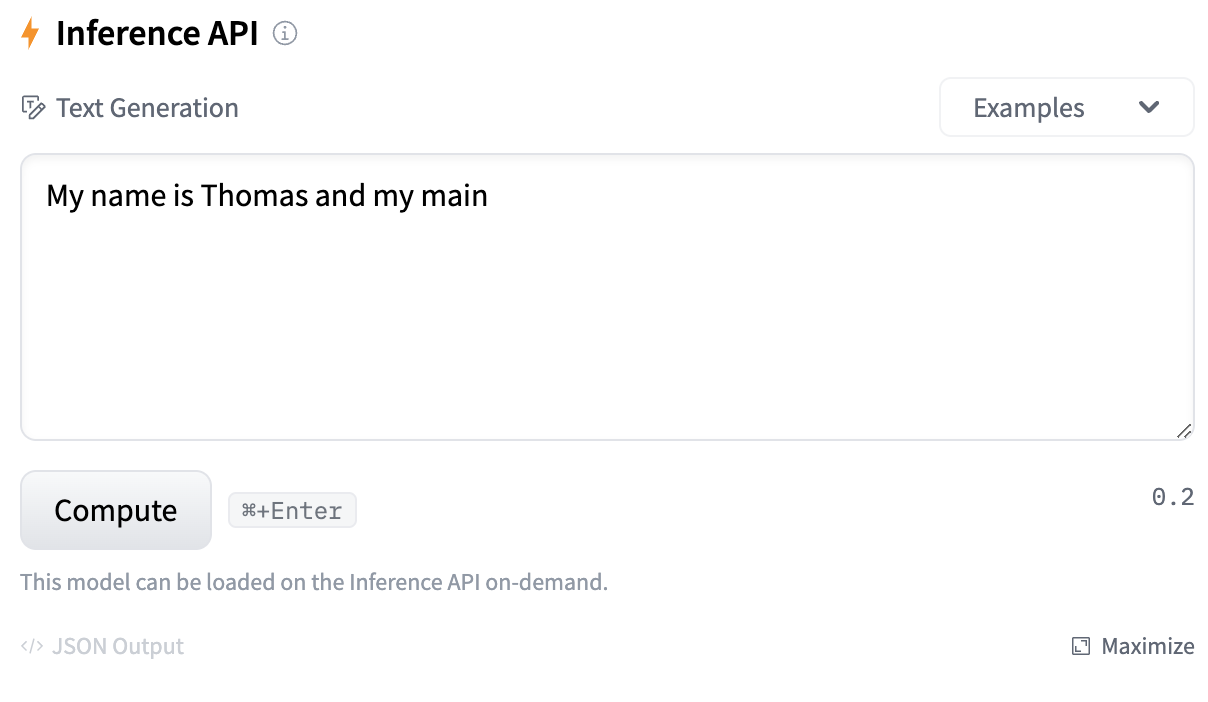

- Masked language modeling: the model has to predict some tokens that are masked in the input. It still has access to the whole sentence, so it can use the tokens before and after the tokens masked to predict their value.

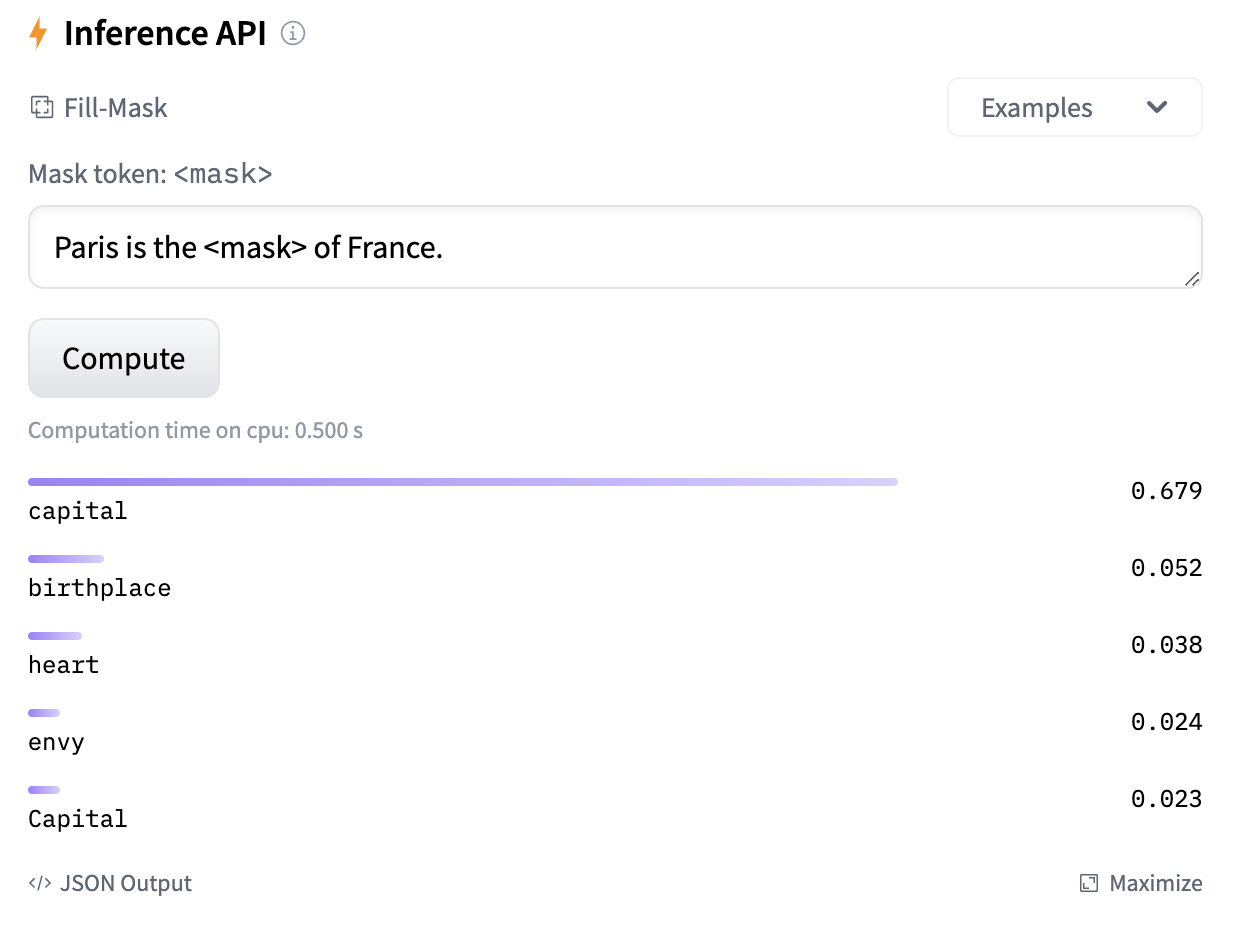


  [Example](https://huggingface.co/distilroberta-base?text=The+%3Cmask%3E+of+life+is+happiness.)

We will see how to easily load and preprocess the dataset for each one of those tasks, and how to use the `huggingface Trainer` API to fine-tune a model on it.

## Preparing the dataset

For each of those tasks, we will use the [Wikitext 2]() dataset as an example. You can load it very easily with the 🤗 Datasets library.

In [ ]:
from datasets import load_dataset
datasets = load_dataset('wikitext', 'wikitext-2-raw-v1')

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/733k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.36M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

To access an actual element, you need to select a split first, then give an index:

In [ ]:
datasets["train"][10]

{'text': ' The game \'s battle system , the BliTZ system , is carried over directly from Valkyira Chronicles . During missions , players select each unit using a top @-@ down perspective of the battlefield map : once a character is selected , the player moves the character around the battlefield in third @-@ person . A character can only act once per @-@ turn , but characters can be granted multiple turns at the expense of other characters \' turns . Each character has a field and distance of movement limited by their Action Gauge . Up to nine characters can be assigned to a single mission . During gameplay , characters will call out if something happens to them , such as their health points ( HP ) getting low or being knocked out by enemy attacks . Each character has specific " Potentials " , skills unique to each character . They are divided into " Personal Potential " , which are innate skills that remain unaltered unless otherwise dictated by the story and can either help or impede

To get a sense of what the data looks like, the following function will show some examples picked randomly in the dataset.

In [ ]:
from datasets import ClassLabel
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [ ]:
show_random_elements(datasets["train"])

,text
0,
1,
2,"Florida Atlantic University and the University of Miami 's Miller School of Medicine established a medical training program within the Charles E. Schmidt College of Biomedical Science in 2004 . Plans originally called for the construction of a new teaching hospital in coordination with Boca Raton Community Hospital on the main campus . Following successive budgets deficits in 2007 , the hospital delayed its participation indefinitely . However , Florida Atlantic later established its own College of Medicine in 2010 . The Harbor Branch Oceanographic Institution ( HBOI ) also joined the university in 2007 , creating Florida Atlantic 's seventh campus . To bring HBOI into the university family the Florida Legislature allocated $ 44 million to Florida Atlantic to acquire the institution . \n"
3,"The prognosis is worse in those with larger burns , those who are older , and those who are females . The presence of a smoke inhalation injury , other significant injuries such as long bone fractures , and serious co @-@ morbidities ( e.g. heart disease , diabetes , psychiatric illness , and suicidal intent ) also influence prognosis . On average , of those admitted to United States burn centers , 4 % die , with the outcome for individuals dependent on the extent of the burn injury . For example , admittees with burn areas less than 10 % TBSA had a mortality rate of less than 1 % , while admittees with over 90 % TBSA had a mortality rate of 85 % . In Afghanistan , people with more than 60 % TBSA burns rarely survive . The Baux score has historically been used to determine prognosis of major burns . However , with improved care , it is no longer very accurate . The score is determined by adding the size of the burn ( % TBSA ) to the age of the person , and taking that to be more or less equal to the risk of death . Burns in 2013 resulted in 1 @.@ 2 million years lived with disability and 12 @.@ 3 million disability adjusted life years . \n"
4,"The Gambia also has an under @-@ 19 team that was to play in the African Women 's U @-@ 19 Championship in 2002 . The Gambia 's first match was against Morocco , but the team withdrew from the competition . \n"
5,
6,"Foliot possibly was the son of Roger Foliot and his wife Rohese . Roger held three knight 's fees in Northamptonshire . Probably born sometime between 1150 and 1160 , Hugh was related in some manner to Robert Foliot , his predecessor at Hereford . He was a canon of Hereford Cathedral before becoming Archdeacon of Shropshire by May 1186 . Foliot is a frequent witness on charters as archdeacon , but little else is known of his tenure of the office . From 1212 to 1219 , he served as a papal judge @-@ delegate three times . In 1215 he was also King John 's candidate for the see of St David 's in Wales , but was not elected . \n"
7,
8,
9,"Some Indologists like Professor John Cort have cautioned against giving undue importance to "" intellectual ahiṃsā "" as the basis of anekāntavāda . He points out that Jain monks have also used anekāntavāda and syādvāda as debating weapons to silence their critics and prove the validity of the Jain doctrine over others . According to Dundas , in Jain hands , this method of analysis became a fearsome weapon of philosophical polemic with which the doctrines of Hinduism and Buddhism could be pared down to their ideological bases of simple permanence and impermanence , respectively , and thus could be shown to be one @-@ pointed and inadequate as the overall interpretations of reality they purported to be . On the other hand , the many @-@ sided approach was claimed by the Jains to be immune from criticism since it did not present itself as a philosophical or dogmatic view . \n"


As we can see, some of the texts are a full paragraph of a Wikipedia article while others are just titles or empty lines.

## Causal Language modeling

For causal language modeling (CLM) we are going to take all the texts in our dataset and concatenate them after they are tokenized. Then we will split them in examples of a certain sequence length. This way the model will receive chunks of contiguous text that may look like:
```
part of text 1
```
or
```
end of text 1 [BOS_TOKEN] beginning of text 2
```
depending on whether they span over several of the original texts in the dataset or not. The labels will be the same as the inputs, shifted to the left.

We will use the [`distilgpt2`](https://huggingface.co/distilgpt2) model for this example. You can pick any of the checkpoints listed [here](https://huggingface.co/models?filter=causal-lm) instead:

In [ ]:
model_checkpoint = "distilgpt2"

To tokenize all our texts with the same vocabulary that was used when training the model, we have to download a pretrained tokenizer. This is all done by the `AutoTokenizer` class:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

We can now call the tokenizer on all our texts. This is very simple, using the [`map`](https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasets.Dataset.map) method from the Datasets library. First we define a function that call the tokenizer on our texts:

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"])

Then we apply it to all the splits in our `datasets` object, using `batched=True` and 4 processes to speed up the preprocessing. We won't need the `text` column afterward, so we discard it.

In [ ]:
tokenized_datasets = datasets.map(tokenize_function, batched=True, num_proc=4, remove_columns=["text"])

Map (num_proc=4):   0%|          | 0/4358 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/36718 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/3760 [00:00<?, ? examples/s]

If we now look at an element of our datasets, we will see the text have been replaced by the `input_ids` the model will need:

In [ ]:
tokenized_datasets["train"][1]

{'input_ids': [796, 569, 18354, 7496, 17740, 6711, 796, 220, 198],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

Now for the harder part: we need to concatenate all our texts together then split the result in small chunks of a certain `block_size`. To do this, we will use the `map` method again, with the option `batched=True`. This option actually lets us change the number of examples in the datasets by returning a different number of examples than we got. This way, we can create our new samples from a batch of examples.

First, we grab the maximum length our model was pretrained with. This might be a big too big to fit in your GPU RAM, so here we take a bit less at just 128.

In [ ]:
# block_size = tokenizer.model_max_length
block_size =128

Then we write the preprocessing function that will group our texts:

In [ ]:
def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can
        # customize this part to your needs.
    total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

First note that we duplicate the inputs for our labels. This is because the model of the 🤗 Transformers library apply the shifting to the right, so we don't need to do it manually.

Also note that by default, the `map` method will send a batch of 1,000 examples to be treated by the preprocessing function. So here, we will drop the remainder to make the concatenated tokenized texts a multiple of `block_size` every 1,000 examples. You can adjust this behavior by passing a higher batch size (which will also be processed slower). You can also speed-up the preprocessing by using multiprocessing:

In [ ]:
lm_datasets = tokenized_datasets.map(
    group_texts,
    batched=True,
    batch_size=1000,
    num_proc=4,
)

Map (num_proc=4):   0%|          | 0/4358 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/36718 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/3760 [00:00<?, ? examples/s]

And we can check our datasets have changed: now the samples contain chunks of `block_size` contiguous tokens, potentially spanning over several of our original texts.

In [ ]:
tokenizer.decode(lm_datasets["train"][1]["input_ids"])

' game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . \n The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more forgiving for series newcomers . Character designer Raita Honjou and composer Hitoshi Sakimoto both returned from previous entries , along with Valkyria Chronicles II director Takeshi Oz'

Now that the data has been cleaned, we're ready to instantiate our `Trainer`. We will a model:

In [ ]:
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained(model_checkpoint)

And some `TrainingArguments`:

In [ ]:
from transformers import Trainer, TrainingArguments

In [ ]:
model_name = model_checkpoint.split("/")[-1]
training_args = TrainingArguments(
    f"{model_name}-finetuned-wikitext2",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    push_to_hub=False,
    num_train_epochs = 1,
    report_to="none"

)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


We pass along all of those to the `Trainer` class:

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_datasets["train"],
    eval_dataset=lm_datasets["validation"],
)

And we can train our model:

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss


Once the training is completed, we can evaluate our model and get its perplexity on the validation set like this:

In [ ]:
import math
eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

Perplexity: 40.01


## Masked language modeling

For masked language modeling (MLM) we are going to use the same preprocessing as before for our dataset with one additional step: we will randomly mask some tokens (by replacing them by `[MASK]`) and the labels will be adjusted to only include the masked tokens (we don't have to predict the non-masked tokens).

We will use the [`distilroberta-base`](https://huggingface.co/distilroberta-base) model for this example. You can pick any of the checkpoints listed [here](https://huggingface.co/models?filter=masked-lm) instead:

In [ ]:
model_checkpoint = "distilroberta-base"

We can apply the same tokenization function as before, we just need to update our tokenizer to use the checkpoint we just picked:

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
tokenized_datasets = datasets.map(tokenize_function, batched=True, num_proc=4, remove_columns=["text"])

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map (num_proc=4):   0%|          | 0/4358 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (544 > 512). Running this sequence through the model will result in indexing errors


Map (num_proc=4):   0%|          | 0/36718 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (638 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors


Map (num_proc=4):   0%|          | 0/3760 [00:00<?, ? examples/s]

And like before, we group texts together and chunk them in samples of length `block_size`. You can skip that step if your dataset is composed of individual sentences.

In [ ]:
lm_datasets = tokenized_datasets.map(
    group_texts,
    batched=True,
    batch_size=1000,
    num_proc=4,
)

Map (num_proc=4):   0%|          | 0/4358 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/36718 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/3760 [00:00<?, ? examples/s]

The rest is very similar to what we had, with two exceptions. First we use a model suitable for masked LM:

In [ ]:
from transformers import AutoModelForMaskedLM
model = AutoModelForMaskedLM.from_pretrained(model_checkpoint)

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


We redefine our `TrainingArguments`:

In [ ]:
model_name = model_checkpoint.split("/")[-1]
training_args = TrainingArguments(
    f"{model_name}-finetuned-wikitext2",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    push_to_hub=False,
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Finally, we use a special `data_collator`. The `data_collator` is a function that is responsible of taking the samples and batching them in tensors. In the previous example, we had nothing special to do, so we just used the default for this argument. Here we want to do the random-masking. We could do it as a pre-processing step (like the tokenization) but then the tokens would always be masked the same way at each epoch. By doing this step inside the `data_collator`, we ensure this random masking is done in a new way each time we go over the data.

To do this masking for us, the library provides a `DataCollatorForLanguageModeling`. We can adjust the probability of the masking:

In [ ]:
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)

Then we just have to pass everything to `Trainer` and begin training:

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_datasets["train"],
    eval_dataset=lm_datasets["validation"],
    data_collator=data_collator,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,2.083100,1.935317
2,1.985800,1.884021
3,1.942200,1.834043


TrainOutput(global_step=7218, training_loss=2.031020779925458, metrics={'train_runtime': 1527.2384, 'train_samples_per_second': 37.798, 'train_steps_per_second': 4.726, 'total_flos': 1913931601832448.0, 'train_loss': 2.031020779925458, 'epoch': 3.0})

Like before, we can evaluate our model on the validation set. The perplexity is much lower than for the CLM objective because for the MLM objective, we only have to make predictions for the masked tokens (which represent 15% of the total here) while having access to the rest of the tokens. It's thus an easier task for the model.

In [ ]:
eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

Perplexity: 6.42
